## Final Project: House Prices Prediction
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  

### Team MLAIRE: Chi Iong Ansjory, Prabhat Tripathi, Soodong Kim, Tina Agarwal

Sections
- [1. Introduction](#Introduction)
- [2. Import Libraries](#import_libraries)
- [3. Data Loading](#data_loading)
- [4. Exploratory Data Analysis](#eda)
- [5. Feature Engineering](#feature_engineering)
- [6. Modeling](#modeling)
- [7. Summary & Key Results](#summary)
- [8. References](#references)



<a id='Introduction'></a>
# 1. Introduction

The goal of this project is to predict sale price of residential homes in Ames, Iowa based on the given training and test data sets. There are 79 explanatory variables describing different aspects of residential homes with 1,460 observations in both training and test data sets. 

The output variable (*SalePrice*) is numeric (interval) whereas the explanatory (LHS) variables are a combination of numeric (interval) and categorical variables. 

Considering the size and nature of the data set, and informed by our domain understanding, we believe that *feature engineering* -- crafting data features optimized for machine learning -- is key for better modeling for this problem. Specifically, we plan to perform following:

1. Load data, perform sanity check and fix any obvious data errors.  
2. Perform exploratory data analysis (EDA) on the train data. This includes univariate and bi-variate analysis of  explanatory features to understand their relationships with the output variable *SalePrice*.  
3. Feature Engineering  
   - Missing values and their appropriate imputation.  
   - Transformation of features and feature scaling, if needed.  
   - Encodings to convert categorical features into numerical features so that we can run regression models.  
   - Split train and dev data sets.  
4. Modeling  
   - Here we will try running several regression models and compare them for their prediction results. We will choose the best model or an ensamble of candidate models for final prediction. We also have to watch out for overfitting considering there are a large number of input variables (compared to the training data size).  
5. Summarize the key findings.  

<a id='import_libraries'></a>
# 2. Import Libraries

We import necessary libraries such as sklearn, scipy, pandas, numpy, and seaborn.

In [149]:
# Each plot will not open a new window. 
# required libraries
## pandas
## seaborn
%matplotlib inline

# Import relevant libraries.

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for Projection/learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Sk-Learn libraries for data mangling.
from sklearn import preprocessing

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import norm
from scipy import stats

# Libraries for files
import os

# Python fundamental libraries
import collections

# Disable warnings for more clear output
import warnings 
warnings.filterwarnings('ignore')

<a id='data_loading'></a>
# 3. Data Loading

## Import Data

We import both train and test data from csv files, make copies of both, and display the origin shapes of them.

In [150]:
# Load Data
from sklearn.cross_validation import train_test_split

# Please keep this relative path access to data.
dir_name = os.getcwd()
train_filename = os.path.join(dir_name, 'data/train.csv')
test_filename = os.path.join(dir_name, 'data/test.csv')

# Reading the data
train = pd.read_csv(train_filename)
test  = pd.read_csv(test_filename)

# We copy and preserve the original data frames for reference
train_orig = train.copy()
test_orig = test.copy()

print("Original shapes of train and test datasets:")
train.shape, test.shape

Original shapes of train and test datasets:


((1460, 81), (1459, 80))

<a id='eda'></a>
# 4. Exploratory Data Analysis

Following hyperlinks direct to relevant subsections:
- [Feature Overview](#feature_overview)
- [Numeric Features](#numeric_features)
- [Categorical Features](#categorical_features)
- [Feature Summary](#features_summary)
- [Univariate Analysis](#univariate_analysis)
    - [SalePrice](#saleprice)
    - [GrLivArea](#grlivarea)
    - [LotArea](#lotarea)
    - [PoolArea](#poolarea)
    - [OverallQual](#overallqual)
    - [YearBuilt](#yearbuilt)
    - [Street](#street)
    - [MiscFeature](#miscfeature)
    - [MiscVal](#miscval)
    - [YrSold](#yrsold)
    - [MoSold](#mosold)
- [Bivariate Analysis](#bivariate_analysis)
    - [SalePrice - GrLivArea Relationship](#saleprice_grlivarea)
    - [SalePrice - OverallQual Relationship](#saleprice_overallqual)
    - [SalePrice - YearBuilt Relationship](#saleprice_yearbuilt)
    - [SalePrice - GarageCars Relationship](#saleprice_garagecars)
    - [SalePrice - BsmtQual Relationship](#saleprice_bsmtqual)
    - [SalePrice - BsmtCond Relationship](#saleprice_bsmtcond)
    - [SalePrice - BsmtExposure Relationship](#saleprice_bsmtexposure)
    - [SalePrice - KitchenQual Relationship](#saleprice_kitchenqual)
    - [SalePrice - ExterQual Relationship](#saleprice_exterqual)
    - [SalePrice - Picked Variables Relationship](#saleprice_pickedvars)

In [151]:
# A glimpse of the data set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='feature_overview'></a>
## Feature Overview

In [152]:
# Begin with discriminating between numeric and categorical features (including SalePrice output variable)
numeric_columns = [f for f in train.columns if train.dtypes[f] != 'object']
category_columns = [f for f in train.columns if train.dtypes[f] == 'object']
print('Number of numeric features: {}'.format(len(numeric_columns)))
print('Number of categorical features: {}'.format(len(category_columns)))

Number of numeric features: 38
Number of categorical features: 43


<a id='numeric_features'></a>
## Numeric Features

In [153]:
# From data exploration, we observed that 3 numeric features do not represent interval data. In fact, they should
# be treated as categorical features. Convert 3 numeric features to categorical by changing their type.
#train['MoSold'] = train.astype(str)
#train['YrSold'] = train.astype(str)
#train['MSSubClass'] = train['MSSubClass'].astype(str)
#train['MSSubClass'] = train.astype(str)

# Re-identifying numeric features
numeric_columns = [f for f in train.columns if train.dtypes[f] != 'object']
print('* Number of numeric features: {}'.format(len(numeric_columns)))

# Print numeric features and some properties
print("------------------------------------- Numeric Features --------------------------------------------")
print(numeric_columns)
print("---------------------------------------------------------------------------------------------------")

# We also look at numeric features that have small number of unique "discrete" values
discrete_columns = []
print("\n* Discrete features (Numeric features with small number of unique values)")
for col in numeric_columns:
    if (train[col].nunique() <= 10):
        discrete_columns.append(col)
        print ('{}: {}'.format(col, train[col].nunique()))        

* Number of numeric features: 38
------------------------------------- Numeric Features --------------------------------------------
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
---------------------------------------------------------------------------------------------------

* Discrete features (Numeric features with small number of unique values)
OverallQual: 10
OverallCond: 9
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
Fireplaces: 4
GarageCars: 5
PoolArea: 8
YrSold: 5


<a id='categorical_features'></a>
## Categorical Features

In [154]:
category_columns = [f for f in train.columns if train.dtypes[f] == 'object']
print('* Number of categorical features: {}'.format(len(category_columns)))
# print Categorical feature names
print("----------------------------------- Categorical Features ------------------------------------------")
print(category_columns)
print("---------------------------------------------------------------------------------------------------")

# For ordinal variables, from data description and exploration, we observed several categorical variables whose
# values have order. This may be important in modeling where we treat these variables differently.
ordinals_columns = ['KitchenQual', 'Fence', 'Functional', 'LotShape','LandSlope','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical',
            'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC']

print("\n* Candidate Ordinal features (Categorical features with small number of unique values)")
for col in ordinals_columns:
    if (train[col].nunique() <= 10):
        print ('{}: {}, {}'.format(col, train[col].nunique(), train[col].unique()))

* Number of categorical features: 43
----------------------------------- Categorical Features ------------------------------------------
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
---------------------------------------------------------------------------------------------------

* Candidate Ordinal features (Categorical features with small number of unique values)
KitchenQual: 4, ['Gd' 'TA' 'Ex' 'Fa']
Fence: 4, [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Functional:

We will understand the relationship of candidate ordinal features and SalePrice to determine if they are truly ordinal features.
We will do this check by understanding the relationship between a feature and SalePrice. If SalePrice increases with the 
order of values in the a feature, we can model the feature as Ordinal feature.

<a id='features_summary'></a>
## Feature Summary

From above analysis, we categorized features into 4 categories. Numeric, Numeric (Discrete), Categorical, Catagorical (Ordinal).  

The following table summarizes all the features by including important properties for each of them.  

Descriptions of variables are based on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. Variable types are either categorical, or discrete/non-discrete numeric. There are 4 different "Segments": Sale (sale transaction of house), Location (where the house located), Building (physical characteristics), Space (space properties of house). For numerical variables, mean, min, max, and number of NaNs are derived from descriptive statistics, and also determine if it is discrete from the histogram. For categorical variables, number of NaNs and distinct values are determined by histogram. There are 3 levels of "Expectations": High, Medium, and Low of how the variables are related to the sale price. 

|  | Variable | Description | Type | Segment | Mean | Min | Max | NaN | Distinct Value | Expectated Relevance | Comments |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | SalePrice | Property's sale price in dollars | Numeric | Building  | 180921 | 34900 | 755000 | 0 | | | Output variable |  |
| 2 | MSSubClass | Building class | Categorical| Building  | | | | 0 | 15 | Low |  |
| 3 | MSZoning | General zoning classification | Categorical | Building | | | | 0 | 5  | Low |  |
| 4 | LotFrontage | Linear feet of street connected to property | Numeric | Space |70 | 21 | 313 | 259 | | Medium |  |
| 5 | LotArea | Lot size in square feet | Numeric | Space | 10516 | 1300 | 215245 | 0 | | High |  |
| 6 | Street | Type of road access | Categorical | Location | | | | 0 | 2 | Low |  |
| 7 | Alley | Type of alley access | Categorical | Location | | | | | 3 | Low | Most values NAs. |
| 8 | LotShape | General shape of property |Categorical (Ordinal) | Location |  | | | 0 | 4 | Low |  |
| 9 | LandContour | Flatness of the property | Categorical | Location |  | | | 0 | 9 | Low |  |
| 10 | Utilities | Type of utilities available |Categorical |  Location |  | | | 0 | 1 | Low | Almost all values same (AllPub) |
| 11 | LotConfig | Lot configuration |Categorical | Location |  | | | 0 | 5 | Medium |  |
| 12 | LandSlope | Slope of property | Categorical (Ordinal)  | Location | | | | 0 | 3 | Low |  |
| 13 | Neighborhood | Physical locations within Ames city limits | Categorical | Location  |  | | | 0 | 25 | Medium |  |
| 14 | Condition1 | Proximity to main road or railroad |Categorical | Location | | | | 0 | 9 | Medium |  |
| 15 | Condition2 | Proximity to main road or railroad (if a second is present) | Categorical | Location | | | | 0 | 2| Low |  |
| 16 | BldgType | Type of dwelling | Categorical | Building | | | | 0 | 5 | Low |  |
| 17 | HouseStyle | Style of dwelling |Categorical | Building |  | | | 0 | 8 | Low |  |
| 18 | OverallQual | Overall material and finish quality | Numeric (Discrete) | Building |6 | 1 | 10 | 0 | | High |  |
| 19 | OverallCond | Overall condition rating | Numeric (Discrete)  | Building | 5 | 1 | 9 | 0 | | Medium |  |
| 20 | YearBuilt | Original construction date | Categorical |Building  | | | | 0 | 112 | High |  |
| 21 | YearRemodAdd | Remodel date | Categorical | Building  | | | | 0 | 61 | High |  |
| 22 | RoofStyle | Type of roof | Categorical | Building | | | | 0 | 5 | Medium |  |
| 23 | RoofMatl | Roof material | Categorical | Building | | | | 0 | 4 | Low |  |
| 24 | Exterior1st | Exterior covering on house | Categorical | Building | | | | 0 | 12 | Medium |  |
| 25 | Exterior2nd | Exterior covering on house (if more than one material) | Categorical | Building | | | | 0 | 16| Low |  |
| 26 | MasVnrType | Masonry veneer type | Categorical | Building  |  | | | 0 | 4 | Low |  |
| 27 | MasVnrArea | Masonry veneer area in square feet | Numeric| Space  | 103 | 0 | 1600 | 8 | 0 | Low |  |
| 28 | ExterQual | Exterior material quality | Categorical (Ordinal) | Building | | | | 0 | 4 | Low |  |
| 29 | ExterCond | Present condition of the material on the exterior | Categorical (Ordinal) | Building  | | | | 0 | 3 | Medium  |  |
| 30 | Foundation | Type of foundation | Categorical | Building | | | | 0 | 6 | Low | |
| 31 | BsmtQual | Evaluates the height of the basement | Categorical (Ordinal) | Building | | | | 0 | 4 | Low |  |
| 32 | BsmtCond | General condition of the basement | Categorical (Ordinal) | Building | | | | 0 | 3 | Medium |  |
| 33 | BsmtExposure | Walkout or garden level basement walls | Categorical (Ordinal)  | Building | | | | 0 | 4 | Low |  |
| 34 | BsmtFinType1 | Quality of basement finished area | Categorical (Ordinal)  | Building  | | | | 0 | 6 | Low |  |
| 35 | BsmtFinSF1 | Type 1 finished square feet | Numeric | Space |443 | 0 | 5644 | 0 | | Medium |  |
| 36 | BsmtFinType2 | Quality of second finished area (if present) | Categorical (Ordinal)  | Building | | | | 0 | 6 | Low |  |
| 37 | BsmtFinSF2 | Type 2 finished square feet | Numeric | Space | 46 | 0 | 1474 | 0 | | Low |  |
| 38 | BsmtUnfSF | Unfinished square feet of basement area | Numeric | Space | 567 | 0 | 2336 | 0 | | Medium |  |
| 39 | TotalBsmtSF | Total square feet of basement area | Numeric | Space | 1057 | 0 | 6110 | 0 | | High |  |
| 40 | Heating | Type of heating | Categorical | Building  | | | | 0 | 3 | Low |  |
| 41 | HeatingQC | Heating quality and condition | Categorical (Ordinal)  | Building | | | | 0 | 5 | Low |  |
| 42 | CentralAir | Central air conditioning | Categorical | Building  | | | | 0 | 2 | Medium |  |
| 43 | Electrical | Electrical system | Categorical (Ordinal)  | Building | | | | 1 | 5 | Low |  |
| 44 | 1stFlrSF | First Floor square feet | Numeric | Space | 1162 | 334 | 4692 | 0 | | High |  |
| 45 | 2ndFlrSF | Second floor square feet | Numeric | Space | 346 | 0 | 2065 | 0 | | Medium |  |
| 46 | LowQualFinSF | Low quality finished square feet (all floors) | Numeric | Space | 5 | 0 | 572 | 0 | | Low |  |
| 47 | GrLivArea | Above grade (ground) living area square feet | Numeric | Space | 1515 | 334 | 5642 | 0 | | High |  |
| 48 | BsmtFullBath | Basement full bathrooms | Numeric (Discrete) | Building | 0 | 0 | 3 | 0 | | Low |  |
| 49 | BsmtHalfBath | Basement half bathrooms | Numeric (Discrete) | Building | 0 | 0 | 2 | 0 | | Low |  |
| 50 | FullBath | Full bathrooms above grade | Numeric (Discrete) | Building | 1 | 0 | 3 | 0 | | High |  |
| 51 | HalfBath | Half baths above grade | Numeric (Discrete) | Building |  0 | 0 | 2 | 0 | | Low |  |
| 52 | BedroomAbvGr | Number of bedrooms above basement level | Numeric (Discrete) | Building | 2 | 0 | 8 | 0 | | Medium |  |
| 53 | KitchenAbvGr | Number of kitchens | Numeric (Discrete) | Building | 1 | 0 | 3 | 0 | | Low |  |
| 54 | KitchenQual | Kitchen quality | Categorical (Ordinal) | Building | | | | 0 | 4 | Medium |  |
| 55 | TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) | Numeric | Building  | 6 | 2 | 14 | 0 | | High |  |
| 56 | Functional | Home functionality rating | Categorical (Ordinal) | Building | | | | 0 | 7 | Low |  |
| 57 | Fireplaces | Number of fireplaces | Numeric (Discrete) | Building | 0 | 0 | 3 | 0 | | Medium |  |
| 58 | FireplaceQu | Fireplace quality | Categorical (Ordinal)  | Building | | | | 690 | 5 | Low |  |
| 59 | GarageType | Garage location | Categorical | Building | | | | 81 | 6 | Low |  |
| 60 | GarageYrBlt | Year garage was built | Categorical | Building | | | | 81 | 97 | Low |  |
| 61 | GarageFinish | Interior finish of the garage | Categorical (Ordinal)  | Building | | | | 81 | 3 | Low |  |
| 62 | GarageCars | Size of garage in car capacity | Numeric (Discrete) | Building | 1 | 0 | 4 | 0 | | High |  |
| 63 | GarageArea | Size of garage in square feet | Numeric | Space | 472 | 0 | 1418 | 0 | | High |  |
| 64 | GarageQual | Garage quality | Categorical (Ordinal)  | Building | | | | 81 | 5 | Low |  |
| 65 | GarageCond | Garage condition | Categorical (Ordinal)  | Building | | | | 81 | 5 | Low |  |
| 66 | PavedDrive | Paved driveway | Categorical (Ordinal)  | Building | | | | 0 | 3 | Medium |  |
| 67 | WoodDeckSF | Wood deck area in square feet | Numeric | Space | 94 | 0 | 857 | 0 | | Low |  |
| 68 | OpenPorchSF | Open porch area in square feet | Numeric | Space | 46 | 0 | 547 | 0 | | Low |  |
| 69 | EnclosedPorch | Enclosed porch area in square feet | Numeric | Space | 21 | 0 | 552 | 0 | | Low |  |
| 70 | 3SsnPorch | Three season porch area in square feet | Numeric | Space | 3 | 0 | 508 | 0 | | Low |  |
| 71 | ScreenPorch | Screen porch area in square feet | Numeric | Space | 15 | 0 | 480 | 0 | | Low |  |
| 72 | PoolArea | Pool area in square feet | Numeric (Discrete) | Space | 2 | 0 | 738 | 0 | | Medium |  |
| 73 | PoolQC | Pool quality | Categorical (Ordinal)  | Building | | | | 1453 | 3 | Low |  |
| 74 | Fence | Fence quality | Categorical (Ordinal) | Building | | | | 1179 | 4 | Low |  |
| 75 | MiscFeature | Miscellaneous feature not covered in other categories | Categorical | Building | | | | 1406 | 4 | Low |  |
| 76 | MiscVal | $Value of miscellaneous feature | Numeric | Building | 43 | 0 | 15500 | 0 | | Low |  |
| 77 | MoSold | Month Sold | Numeric | Sale | | | | 0 | 12 | Medium | Need to model as categorical |
| 78 | YrSold | Year Sold | Numeric | Sale | | | | 0 | 5 | Medium | Need to model as categorical |
| 79 | SaleType | Type of sale | Categorical | Sale  | | | | 0 | 9 | Medium |  |
| 80 | SaleCondition | Condition of sale | Categorical | Sale | | | | 0 | 6 | Medium | |

<a id='univariate_analysis'></a>
## Univariate Analysis

In this section, we will look at several key columns (variables) individually to understand them better.

<a id='saleprice'></a>
### SalePrice

In [155]:
# Descriptive statistics
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

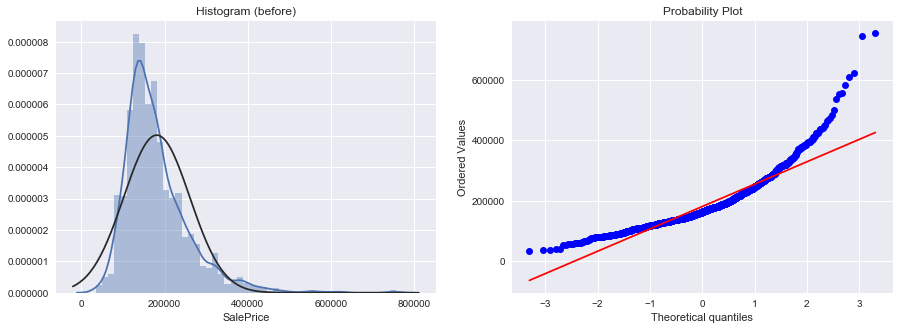

In [156]:
# Histogram and normal probability plot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.distplot(train['SalePrice'], fit=norm).set_title("Histogram (before)");
plt.subplot(1,2,2)   
g = stats.probplot(train['SalePrice'], plot=plt)

In [158]:
# Skewness and Kurtosis
print("Skewness: ", train['SalePrice'].skew())
print("Kurtosis: ", train['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


We see that the target variable *SalePrice* has a right-skewed distribution. Log transformation appears to reduce the skewness. A normally distributed target variable helps in better modeling the relationship between target and independent variables.

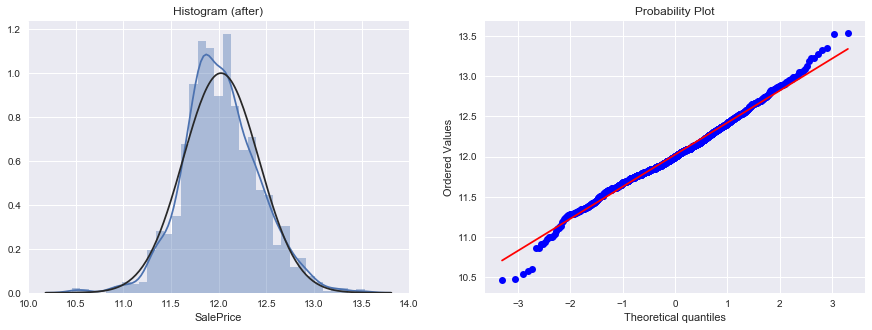

In [157]:
# Applying log transformation
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.distplot(np.log(train['SalePrice']), fit=norm).set_title("Histogram (after)");
plt.subplot(1,2,2)   
g = stats.probplot(np.log(train['SalePrice']), plot=plt)

As we see above log transformation of the target variable helps reduce skewed distribution and the new distribution looks closer to normal. 

<a id='grlivarea'></a>
### GrLivArea

In [159]:
# Descriptive statistics
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Next we look at the histogram to understand the distribution.

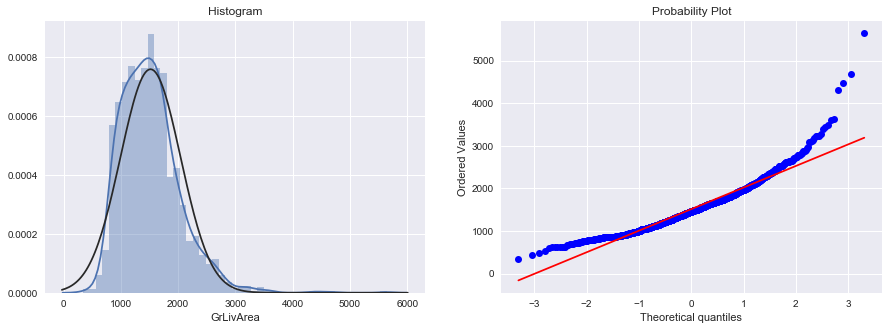

In [160]:
# Histogram and normal probability plot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.distplot(train['GrLivArea'], fit=norm).set_title("Histogram");
plt.subplot(1,2,2)   
g = stats.probplot(train['GrLivArea'], plot=plt)

Looks like log transformation is needed to reduce the skewness and improve normal distribution.

<a id='lotarea'></a>
### LotArea

In [161]:
# Descriptive statistics
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Next we look at the histogram to understand the distribution.

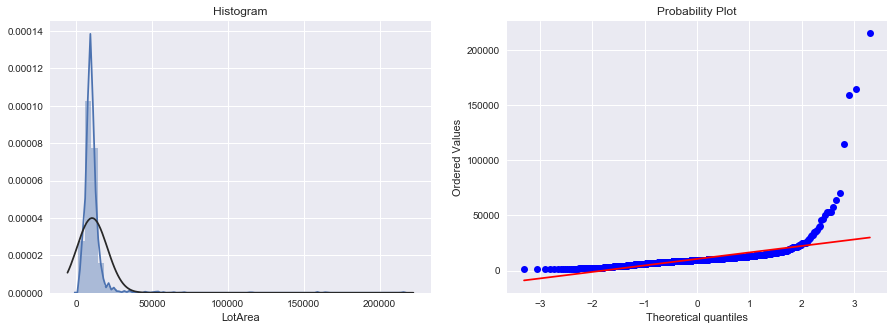

In [162]:
# Histogram and normal probability plot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.distplot(train['LotArea'], fit=norm).set_title("Histogram");
plt.subplot(1,2,2)   
g = stats.probplot(train['LotArea'], plot=plt)

The histogram demonstrates normal distribution but has a long tail.

<a id='poolarea'></a>
### PoolArea

In [15]:
# Descriptive statistics
train['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

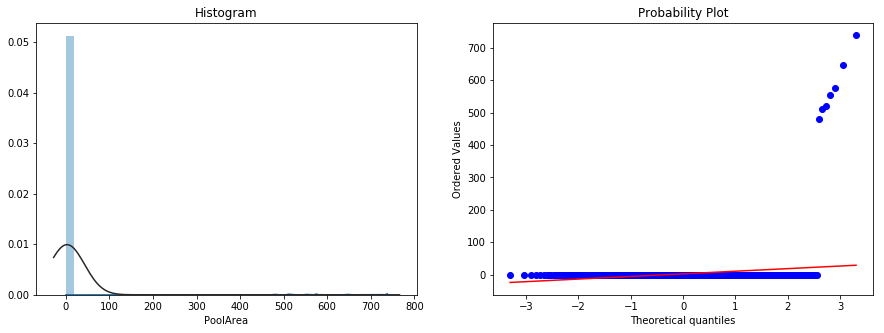

In [16]:
# Histogram and normal probability plot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.distplot(train['PoolArea'], fit=norm).set_title("Histogram");
plt.subplot(1,2,2)   
g = stats.probplot(train['PoolArea'], plot=plt)

Based on the probability plot, only a handful of properties have swimming pools but majority are without one.

<a id='overallqual'></a>
### OverallQual

In [17]:
# Descriptive statistics
train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

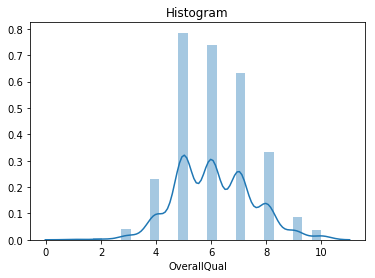

In [18]:
# Histogram
sns.distplot(train['OverallQual']).set_title("Histogram");

As expected, the discrete nature of *OverallQual* feature shows multi-model histogram.

<a id='yearbuilt'></a>
### YearBuilt

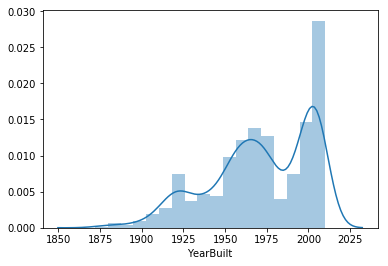

In [19]:
# Histogram
sns.distplot(train['YearBuilt']);

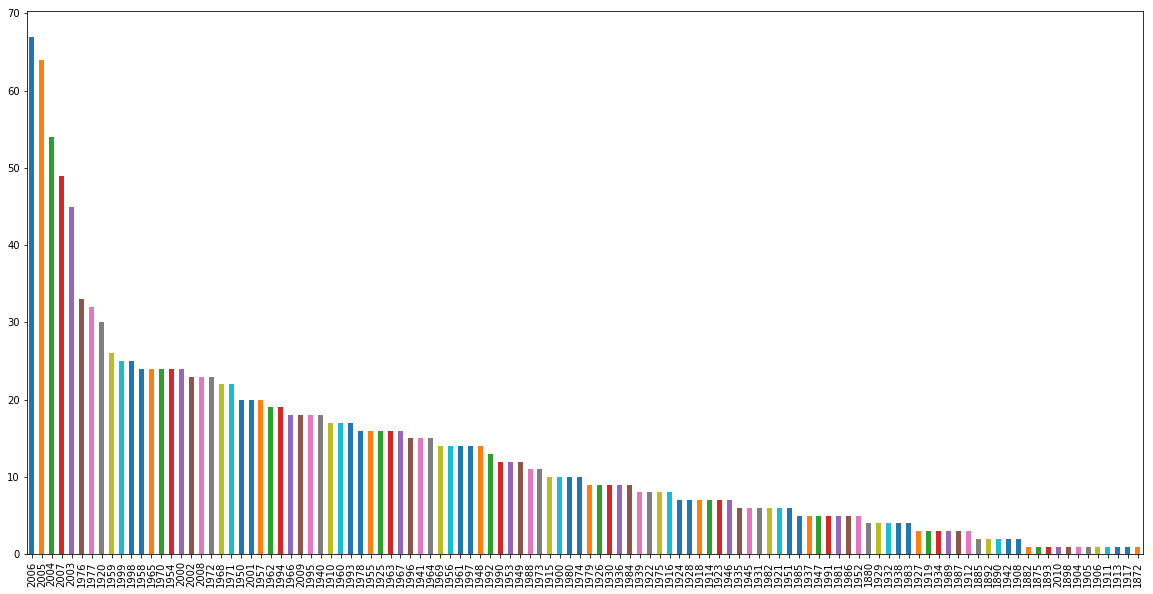

In [20]:
# Sorted in descending order
train['YearBuilt'].value_counts().plot(kind='bar', figsize=(20,10));

The year of house appears to follow power curve.

<a id='street'></a>
### Street

In [181]:
# Descriptive statistics
train['Street'].describe()

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object

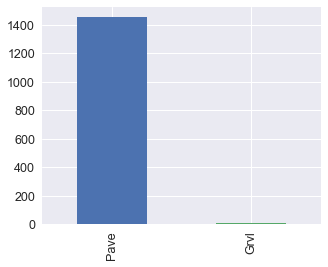

In [180]:
# Sorted in descending order
train['Street'].value_counts().plot(kind='bar', figsize=(5,4));

99.6% of properties have Pave type.

<a id='miscfeature'></a>
### MiscFeature

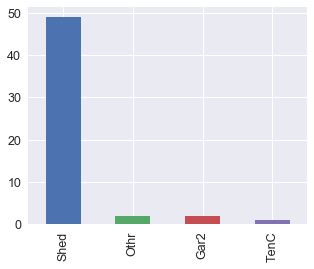

In [183]:
# Sorted in descending order
train['MiscFeature'].value_counts().plot(kind='bar', figsize=(5,4));

Less than 4% of properties come with this *MiscFeature*.

<a id='miscval'></a>
### MiscVal

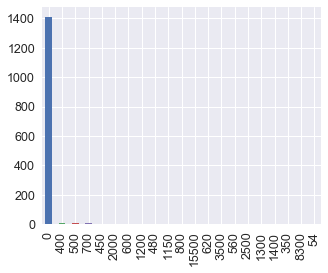

In [185]:
# Sorted in descending order
train['MiscVal'].value_counts().plot(kind='bar', figsize=(5,4));

More than 95% of properties have *MiscVal* with $0.

<a id='yrsold'></a>
### YrSold

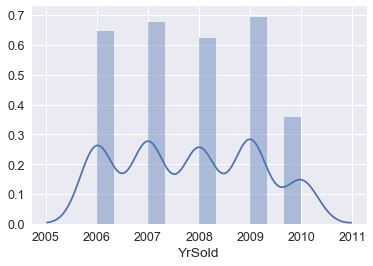

In [187]:
# Histogram
sns.distplot(train['YrSold']);

<a id='mosold'></a>
### MoSold

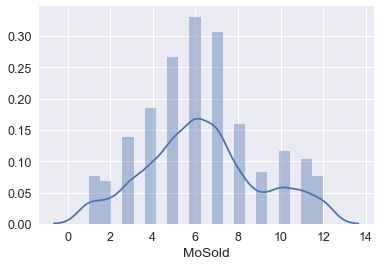

In [188]:
# Histogram
sns.distplot(train['MoSold']);

<a id='bivariate_analysis'></a>
## Bivariate Analysis

In this section, we look at the relationship between target variable (*SalePrice*) and some other relevant features.  

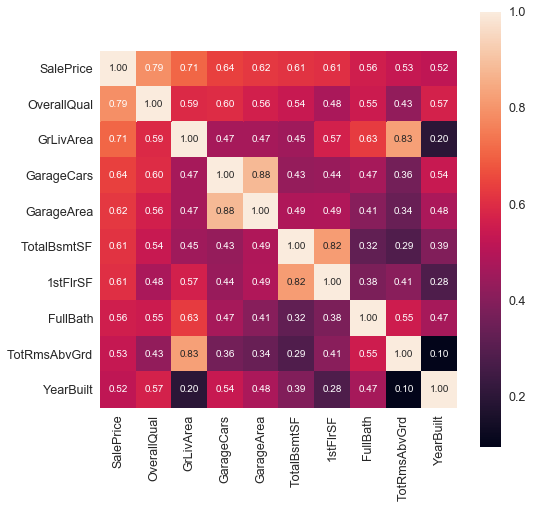

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [170]:
# Correlation matrix showing evidence of multicollearity
# Remove Id column which is totally irrelevant
train_ = train.drop(['Id'], axis=1, errors='raise')
corrmat = train_.corr()

# Saleprice correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Let us print top correlated features (both positively and negatively) with SalePrice
corr_matrix = train_.corr()
print (corr_matrix['SalePrice'].sort_values(ascending=False)[:10], '\n') # top 10 values
print ('----------------------')
print (corr_matrix['SalePrice'].sort_values(ascending=False)[-10:]) # bottom 10 values

From the correlation matrix (lighter color -> better correlation), some of the highly correlated features appear to be *OverallQual*, *YearBuilt*, *YearRemodAdd*, *TotalBsmtSF*, *1stFlrSF*, *GrLivArea*, *FullBath*, *TotRmsAbvGrd*, *GarageCars*, and *GarageArea*.

As we can see, some variables seem to be strongly correlated with the target variable. Here we see that the *OverallQual* feature is 79% correlated with the target variable. *OverallQual* feature Rates the overall material and finish of the house. This seems to be the parameter that affects the sale price positively. In addition, *GrLivArea* is 70% correlated with the target variable. *GrLivArea* refers to the living area (in sq ft.) above ground.

<a id='saleprice_grlivarea'></a>
### SalePrice - GrLivArea Relationship

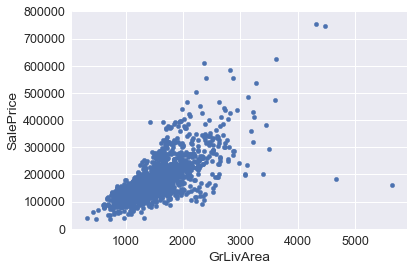

In [22]:
# Scatterplot of GrLivArea/SalePrice
data = pd.concat([train['SalePrice'], train_['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

*GrLivArea* and *SalePrice* seem to have linear relationship of larger the area, higher the price. However, there are a few observable outliers, though, on the higher extremes of areas.

<a id='saleprice_overallqual'></a>
### SalePrice - OverallQual Relationship

Since *OverallQual* is a discrete variable, we look at the boxplots.

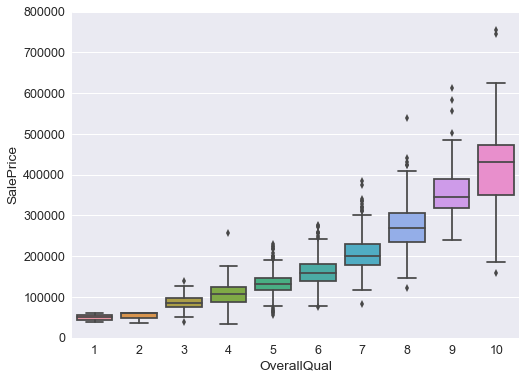

In [23]:
# Boxplot of OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

The boxplot shows strong relationship between overall quality of the house and its sale price.

<a id='saleprice_yearbuilt'></a>
### SalePrice - YearBuilt Relationship

Again, boxplot also shows the general trend of higher price for newer house:

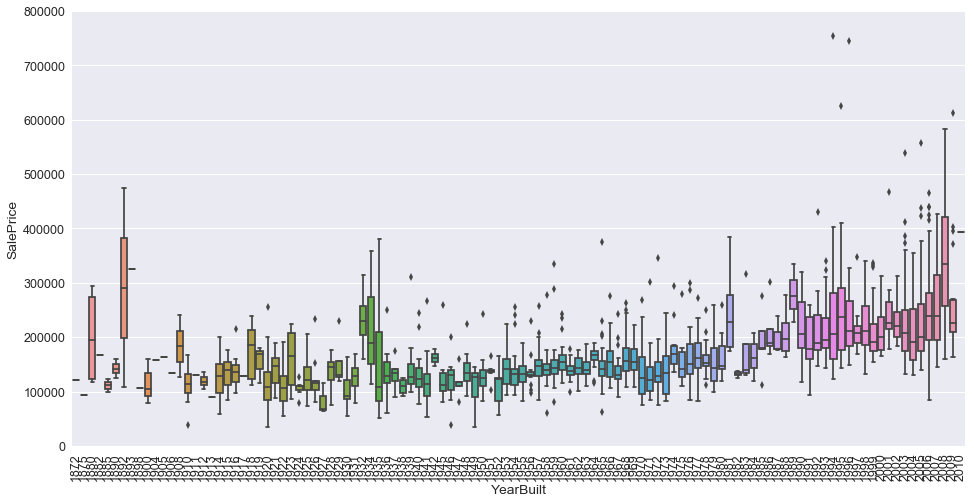

In [24]:
# Boxplot of YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

<a id='saleprice_garagecars'></a>
### SalePrice - GarageCars Relationship

The boxplot shows that there is linear relationship between size of garage and price when garage size is between 0 and 3. House with 4-car garage, though, doesn't appears to positively influence sale price.

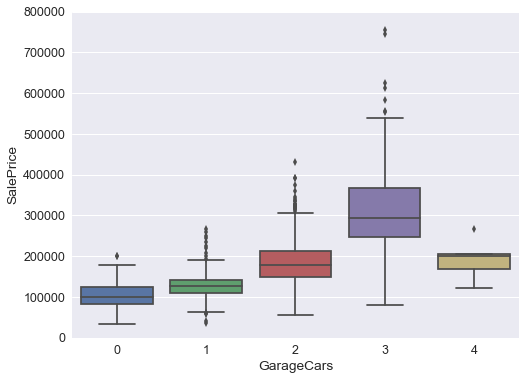

In [25]:
# Boxplot of GarageCars/SalePrice
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<a id='saleprice_bsmtqual'></a>
### SalePrice - BsmtQual Relationship

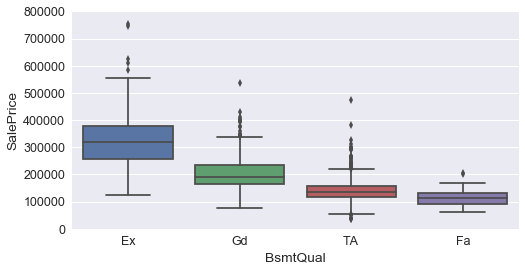

In [200]:
# Boxplot of BsmtQual/SalePrice
var = 'BsmtQual'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000);

It shows a linear relationship between sale price and different tier of basement quality.

<a id='saleprice_bsmtcond'></a>
### SalePrice - BsmtCond Relationship

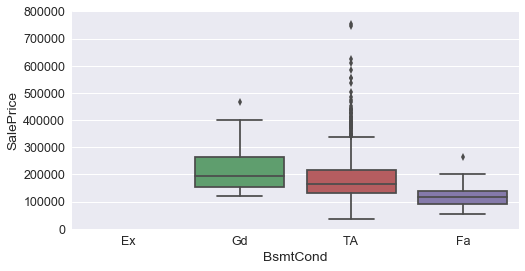

In [201]:
# Boxplot of BsmtCond/SalePrice
var = 'BsmtCond'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000);

It shows a linear relationship between sale price and different tier of basement condition.

<a id='saleprice_bsmtexposure'></a>
### SalePrice - BsmtExposure Relationship

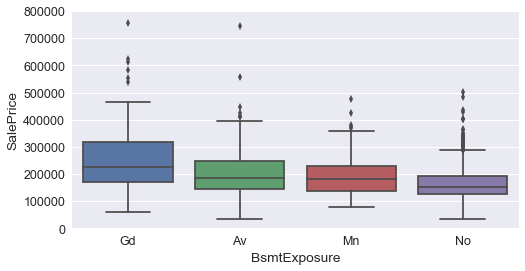

In [202]:
# Boxplot of BsmtExposure/SalePrice
var = 'BsmtExposure'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=["Gd", "Av", "Mn", "No"])
fig.axis(ymin=0, ymax=800000);

It shows a linear relationship between sale price and different tier of basement exposure.

<a id='saleprice_kitchenqual'></a>
### SalePrice - KitchenQual Relationship

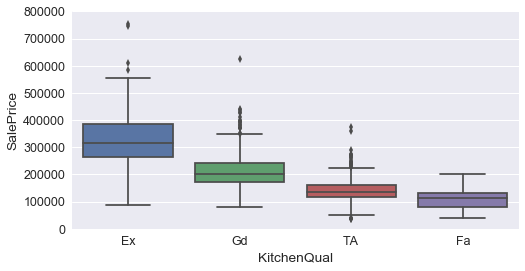

In [203]:
# Boxplot of KitchenQual/SalePrice
var = 'KitchenQual'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000);

It shows a linear relationship between sale price and different tier of kitchen quality.

<a id='saleprice_exterqual'></a>
### SalePrice - ExterQual Relationship

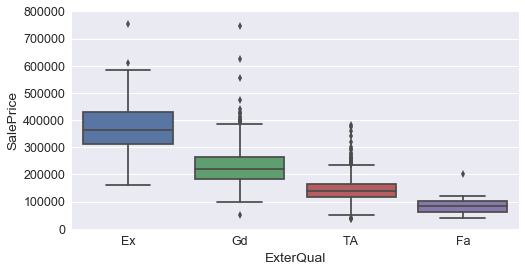

In [205]:
# Boxplot of ExterQual/SalePrice
var = 'ExterQual'
data = pd.concat([train['SalePrice'], train_[var]], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000);

It shows a linear relationship between sale price and different tier of exterior quality.

<a id='saleprice_pickedvars'></a>
### SalePrice - Picked Variables Relationship

From the scatterplot of *SalePrice* vs the 10 picked variables, look like all demonstrate linear relationship with sale price.

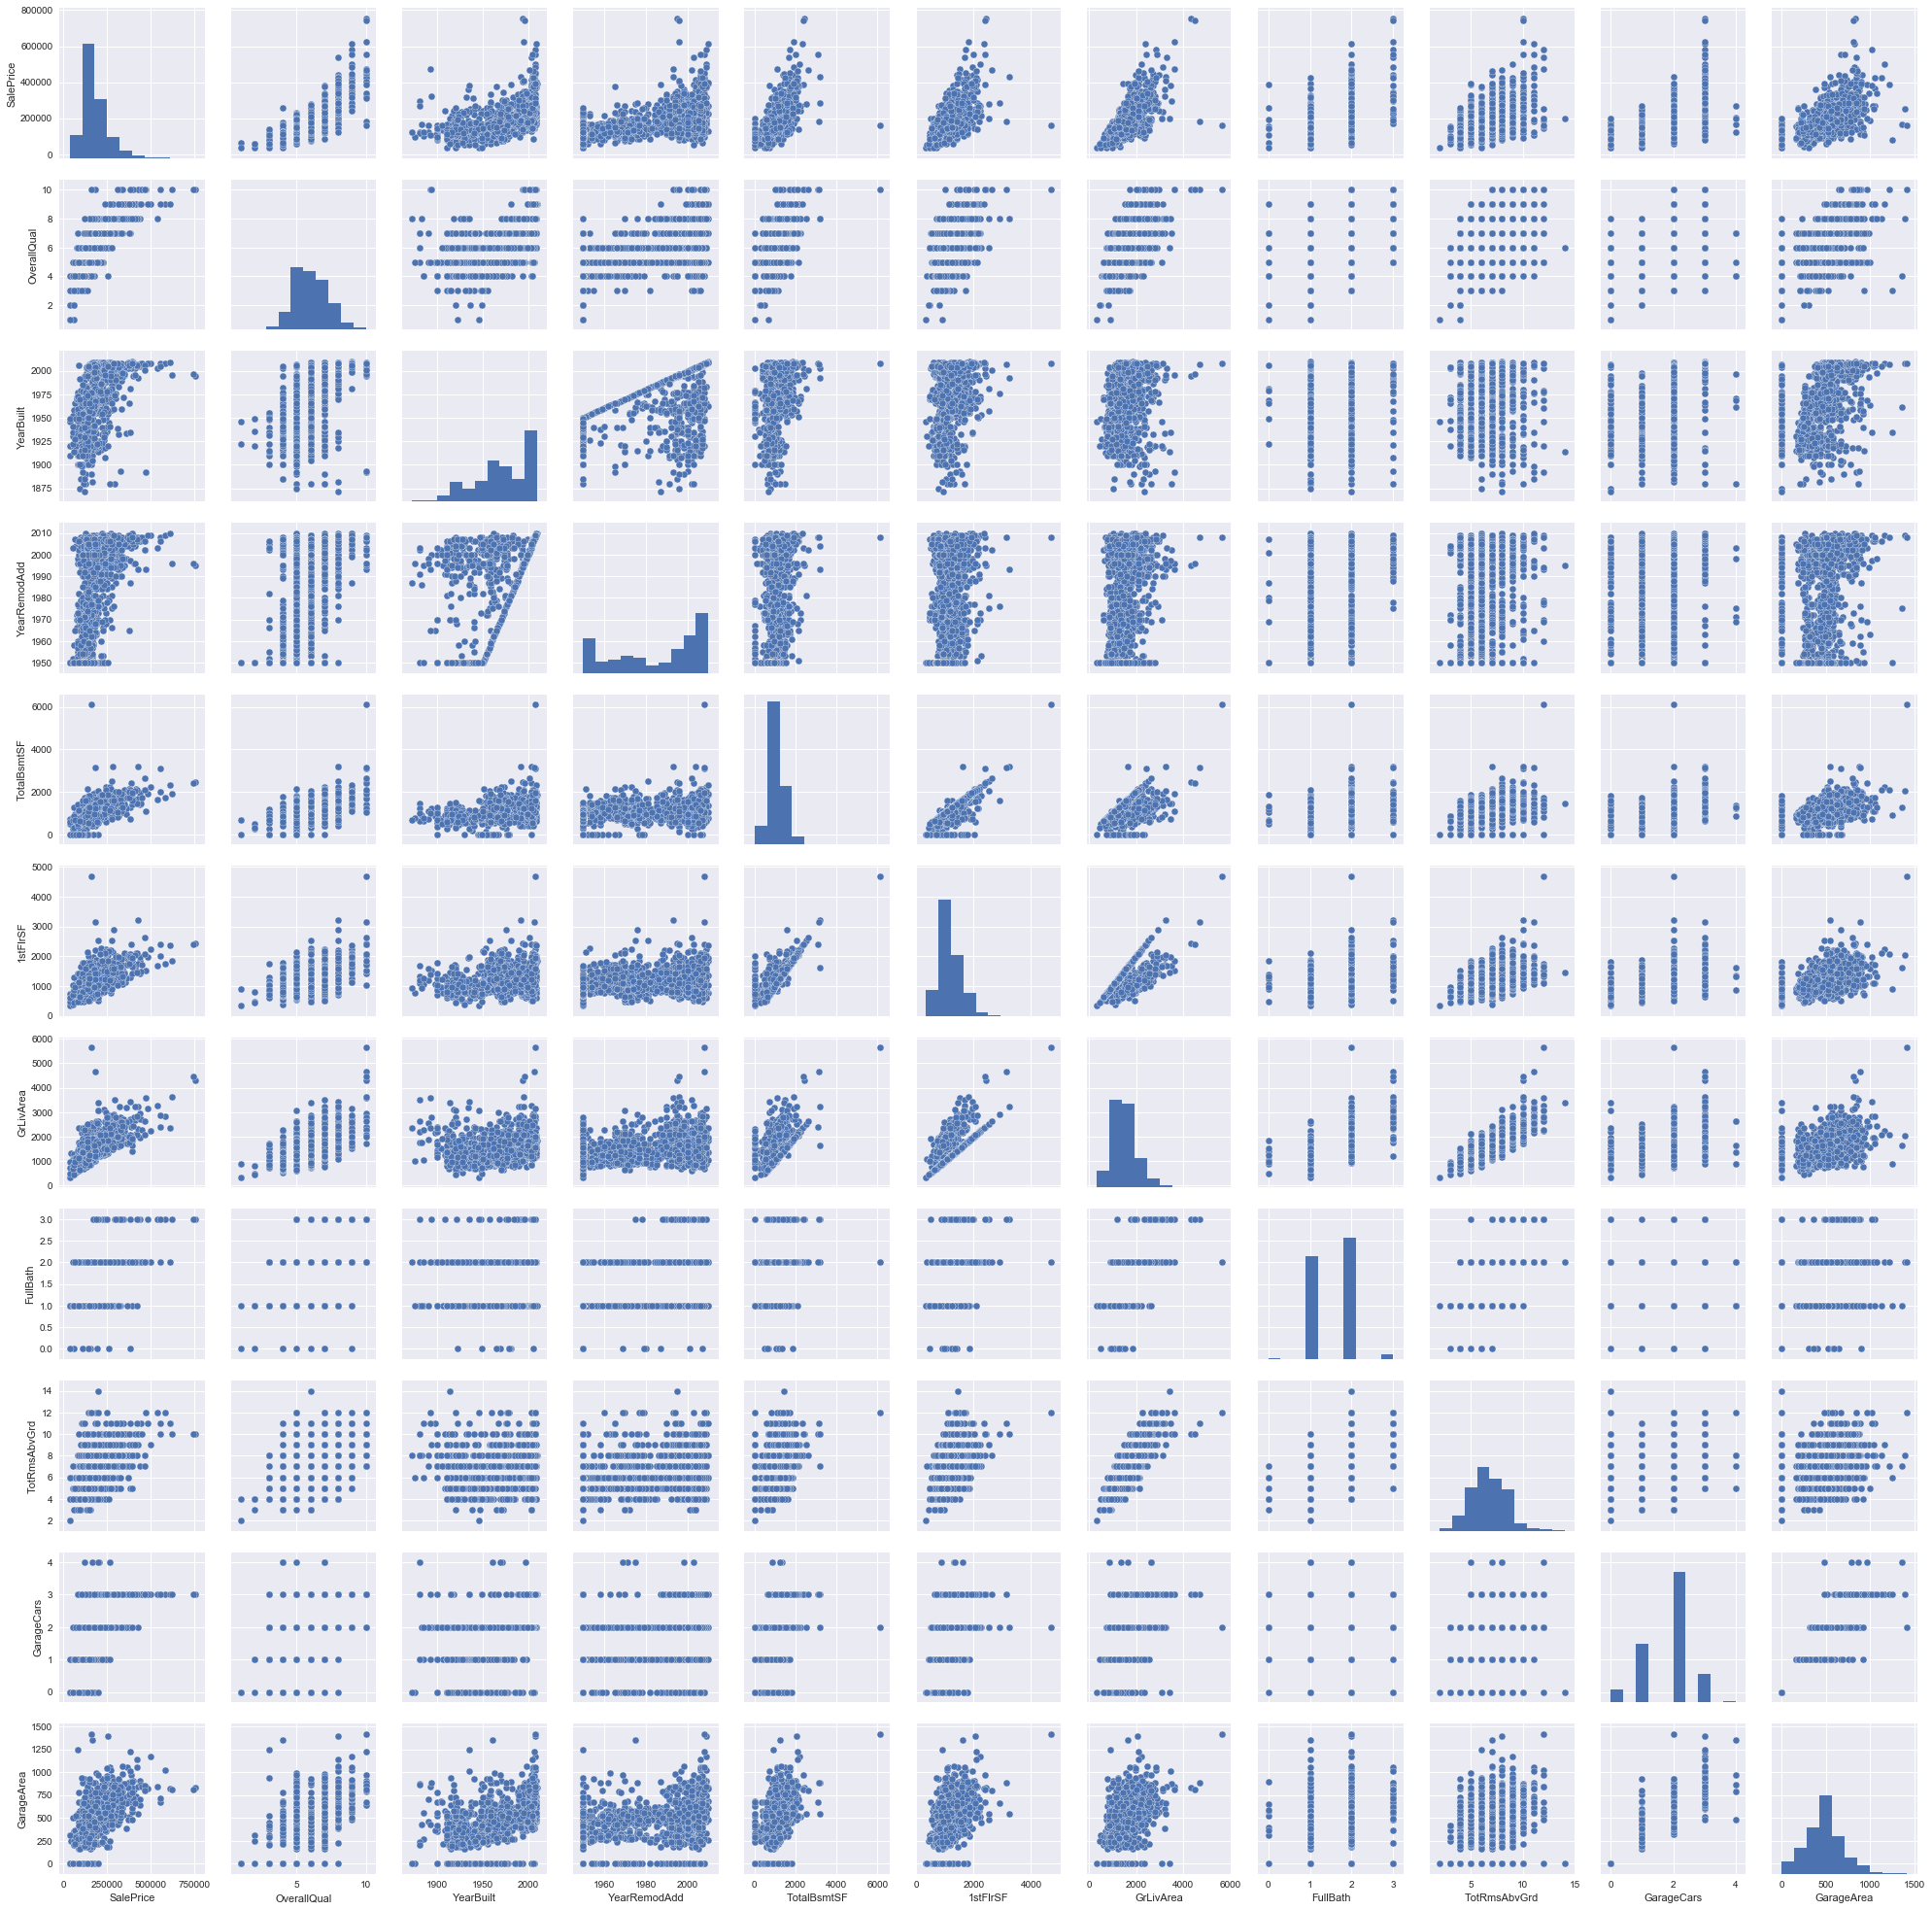

In [26]:
# Scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
        'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
sns.pairplot(train_[cols], size=2.5)
plt.show();

<a id='feature_engineering'></a>
# 5. Feature Engineering

Following hyperlinks direct to relevant subsections:
- [Drop Outlier Rows](#drop_outlier_row) 
- [Combine Train and Test Data](#combining_data)
- [Remove Meaningless Columns](#remove_bad_columns)
- [Missing Data Analysis](#missing_data_analysis)
- [Missing Data Handling](#missing_data_handling)
- [Missing Values Handling](#impute_NaN_values)
- [Data Preparation](#data_preparation)
    - [Log Transformations](#log_transformations)
    - [Manually Encoding Ordinal Features](#ordinal_encoding)
    - [Data Binning](#data_binning)
    - [Cleanup For Binning Applied Columns](#binning_cleanup)
    - [Categorical Features: Conversion to Dummy/Indicator Variables](#categorical_encoding)
- [Split Back into Train and Test](#split_back)

<a id='drop_outlier_row'></a>
## Drop Outlier Rows

In [27]:
# From univariate analysis we saw that a couple of items with GrLivArea > 4000 are outliers and may not help
# generalizing the model
train.drop(train[(train['GrLivArea'] > 4000)].index,inplace=True)

<a id='combining_data'></a>
## Combine Train and Test Data

We will combine train and test data frames so that all feature engineering changes are applied to both together.

In [28]:
# Extract and keep the SalePrice (target) column
Y_train_all = train['SalePrice']
# Drop SalePrice so that is has same cardinality as test dataframe
train.drop('SalePrice', axis=1, inplace=True)

# Preseve test dataset IDs. We will need them for final prediction/submission
test_id = test.iloc[:,0]

# Combine test and train
combined_df = pd.concat([train, test]).reset_index()
combined_df.shape

(2915, 81)

<a id='remove_bad_columns'></a>
## Remove Meaningless Columns

In [29]:
# ID is not useful
combined_df.drop('Id', axis=1, inplace=True)

# Almost all rows have same value for Utilities, making this variable not useful
combined_df.drop('Utilities', axis=1, inplace=True)

# From the univariate analysis, we also found that these columns does not help explain the variations in SalePrice
# removing these as well
combined_df.drop('Street', axis=1, inplace=True)
combined_df.drop('MiscFeature', axis=1, inplace=True)
combined_df.drop('MiscVal', axis=1, inplace=True)

<a id='missing_data_analysis'></a>
## Missing Data Analysis

In this section, we will analyze missing values in the data set and approach to tackle these.

In [30]:
# Investigate about missing data
# Analyze top 20 columns having missing data
total = combined_df.isnull().sum().sort_values(ascending=False)
percent = (combined_df.isnull().sum() / combined_df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat(
    [total, percent], axis=1, keys=["Total Number of Missing Data", "Missing Data Percentage"])
missing_data.head(20)

,Total Number of Missing Data,Missing Data Percentage
PoolQC,2907,99.725557
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageYrBlt,159,5.454545
GarageCond,159,5.454545
GarageQual,159,5.454545
GarageType,157,5.385935


<a id='missing_data_handling'></a>
## Missing Data Handling

1. Drop columns with ~80% or more missing data

In [31]:
columns_will_be_removed = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

combined_df.drop(columns_will_be_removed, axis=1, inplace=True, errors='ignore')

# Double check whether above columns are removed
total = combined_df.isnull().sum().sort_values(ascending=False)
percent = (combined_df.isnull().sum() / combined_df.isnull().count() * 100).sort_values(ascending=False)

def assert_column_drop(data, col_names):
    for col_name in col_names:
        assert col_name not in data, "%s should not exist" % col_name
        
assert_column_drop(combined_df, columns_will_be_removed)

In [32]:
print("Shape of data set after removing columns with 80% missing data: {}".format(combined_df.shape))

Shape of data set after removing columns with 80% missing data: (2915, 73)


<a id='impute_NaN_values'></a>
## Missing Values Handling

1. From documentation: data_description.txt, the following column's default value (when NaN) is **None**.

In [33]:
default_none_columns = ['FireplaceQu', 'GarageType','GarageFinish','GarageQual',
                        'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'MasVnrType']

for none_column in default_none_columns:
    combined_df[none_column].fillna('None', inplace = True)

2. From documentation: data_description.txt, the following column's default value (when NaN) is **0**. 

In [34]:
default_zero_columns = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero_column in default_zero_columns:
    combined_df[zero_column].fillna(0, inplace = True)

3. Using background knowledge, we set the missing value to the **mode** for some variables.

In [35]:
combined_df['Electrical'].fillna(combined_df['Electrical'].mode()[0], inplace=True)

4. LotFrontage: We will replace missing values with **mean** of the available data points for this column.

In [36]:
combined_df['LotFrontage'].fillna(combined_df['LotFrontage'].mean(), inplace=True)

5. We observed that values for some rows in the **test** data set has missing values (these columns do not have missing values in the train dataset). Missing values for these Categorical (Ordinal) type features: we will impute them with **mode** of the available values

In [37]:
combined_df['MSZoning'].fillna(combined_df['MSZoning'].mode()[0], inplace=True)
combined_df['Functional'].fillna(combined_df['Functional'].mode()[0], inplace=True)
combined_df['SaleType'].fillna(combined_df['SaleType'].mode()[0], inplace=True)
combined_df['KitchenQual'].fillna(combined_df['KitchenQual'].mode()[0], inplace=True)
combined_df['Exterior1st'].fillna(combined_df['Exterior1st'].mode()[0], inplace=True)
combined_df['Exterior2nd'].fillna(combined_df['Exterior2nd'].mode()[0], inplace=True)

Verify that there are no more missing values in the data set:

In [38]:
assert combined_df.isnull().sum().sum() == 0

## Adding new columns (features)

In [39]:
combined_df['TotalAreaSF'] = combined_df['GrLivArea'] + combined_df['TotalBsmtSF'] + combined_df['GarageArea'] + combined_df['EnclosedPorch'] + combined_df['ScreenPorch']
combined_df['LivingAreaSF'] = combined_df['1stFlrSF'] + combined_df['2ndFlrSF']

<a id='data_preparation'></a>
## Data Preparation

In this section, we will prepare data for machine learning modeling. This includes, preprocessing, transformations, encoding and scaling data.

<a id='log_transformations'></a>
### Log Transformations

In [40]:
# As discussed in the EDA above, for SalePrice, we will perform log transformation
Y_train_all = np.log(Y_train_all)

We will also perform log transformation for these numeric features. Note that since the min value of *PoolArea* is 0, we cannot perform log transformation. We will, instead, use *log1p* transformation.

In [41]:
log_features = ['LotArea','PoolArea']

for log_feature in log_features:
    combined_df[log_feature] = np.log1p(combined_df[log_feature])

<a id='ordinal_encoding'></a>
### Manually Encoding Ordinal Features

We manually encode ordered values for ordinal categorical features.

In [42]:
combined_df['BsmtQual'] = combined_df['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
combined_df['BsmtCond'] = combined_df['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
combined_df['BsmtExposure'] = combined_df['BsmtExposure'].map({"None" : 0, "NA":0, "No":1, "Mn":2, "Av":3, "Gd":4})
combined_df['KitchenQual'] = combined_df['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
combined_df['ExterQual'] = combined_df['ExterQual'].map({"Po" : 0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

<a id='data_binning'></a>
### Data Binning

1. To reduce side impact of filled data with default value, we decided to bin year data into pre-1950, 1950-1974, 1975 -2000, and post-2000, respectively. By this approach, if default value is filled by zero, it will be categorized into pre-1950 instead of recognizing data itself as zero. We can assume that if data is missing, house data may not be recorded properly since it was built or remodeled before 1950.
2. After binning, the target column having continuous integer value will be dropped.
3. As a final step, value will be transformed into discrete value such as 1, 2, 3, or 4. Since recent update on the property can have a positive impact, larger value assigned for the recent years can be justfied.

In [43]:
PERIOD_TO_VALUE = {'0': 0, 'Before1950': 1, '1950to1974': 2, '1975to1999': 3, '2000OrLater': 4}

# Data Binning

# GarageYrBlt -> GarageBlt
combined_df.loc[(combined_df["GarageYrBlt"].apply(int) < 1950) & (combined_df["GarageYrBlt"].apply(int) >= 0),
                "GarageBlt"] = 'Before1950'
combined_df.loc[(combined_df["GarageYrBlt"].apply(int) < 1975) & (combined_df["GarageYrBlt"].apply(int) >= 1950),
                "GarageBlt"] = '1950to1974'
combined_df.loc[(combined_df["GarageYrBlt"].apply(int) < 2000) & (combined_df["GarageYrBlt"].apply(int) >= 1975),
                "GarageBlt"] = '1975to1999'
combined_df.loc[combined_df["GarageYrBlt"].apply(int) >= 2000, "GarageBlt"] = '2000OrLater'

# YearRemodAdd -> YrRemodeled
# Assume that there is no remodeling if built year == remodeled year
combined_df.loc[combined_df["YearRemodAdd"] == combined_df["YearBuilt"], "YrRemodeled"] = 0
combined_df.loc[(combined_df["YearRemodAdd"] < 1950) & (combined_df["YearRemodAdd"] != 0),
                "YrRemodeled"] = 'Before1950'
combined_df.loc[(combined_df["YearRemodAdd"] < 1975) & (combined_df["YearRemodAdd"] >= 1950),
                "YrRemodeled"] = '1950to1974'
combined_df.loc[(combined_df["YearRemodAdd"] < 2000) & (combined_df["YearRemodAdd"] >= 1975),
                "YrRemodeled"] = '1975to1999'
combined_df.loc[combined_df["YearRemodAdd"] >= 2000, "YrRemodeled"] = '2000OrLater'

# YearBuilt -> YrBuilt
combined_df.loc[combined_df["YearBuilt"] < 1950, "YrBuilt"] = 'Before1950'
combined_df.loc[(combined_df["YearBuilt"] < 1975) & (combined_df["YearBuilt"] >= 1950), "YrBuilt"] = '1950to1974'
combined_df.loc[(combined_df["YearBuilt"] < 2000) & (combined_df["YearBuilt"] >= 1975), "YrBuilt"] = '1950to1974'
combined_df.loc[combined_df["YearBuilt"] >= 2000, "YrBuilt"] = '2000OrLater'

combined_df['GarageBlt'] = combined_df['GarageBlt'].apply(lambda period: PERIOD_TO_VALUE[period])
combined_df['YrRemodeled'] = combined_df['YrRemodeled'].apply(lambda period: PERIOD_TO_VALUE[period])
combined_df['YrBuilt'] = combined_df['YrBuilt'].apply(lambda period: PERIOD_TO_VALUE[period])

def get_distinct_values(values):
    return ",".join([str(i) for i in (set(values))])

# Check data binning results
print("GarageBlt column values:", get_distinct_values(combined_df["GarageBlt"]))
print("YrRemodeled column values:", get_distinct_values(combined_df["YrRemodeled"]))
print("YrBuilt column values:", get_distinct_values(combined_df["YrBuilt"]))

GarageBlt column values: 1,2,3,4
YrRemodeled column values: 2,3,4
YrBuilt column values: 1,2,4


<a id='binning_cleanup'></a>
### Cleanup For Binning Applied Columns

In [44]:
# Drop columns after data binning. Continuous data is no longer meaningful.
combined_df.drop(['GarageYrBlt', 'YearRemodAdd', 'YearBuilt'], axis=1, inplace=True, errors='ignore')

<a id='categorical_encoding'></a>
### Categorical Features: Conversion to Dummy/Indicator Variables

In [45]:
combined_df.shape
category_columns = [f for f in combined_df.columns if combined_df.dtypes[f] == 'object']
category_columns.sort()
for col in category_columns:
    if (train[col].nunique() <= 10):
        print ('{}: {}, {}'.format(col, combined_df[col].nunique(), combined_df[col].unique()))

BldgType: 5, ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtFinType1: 7, ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2: 7, ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
CentralAir: 2, ['Y' 'N']
Condition1: 9, ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: 8, ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
Electrical: 5, ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
ExterCond: 5, ['TA' 'Gd' 'Fa' 'Po' 'Ex']
FireplaceQu: 6, ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Foundation: 6, ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
Functional: 7, ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
GarageCond: 6, ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
GarageFinish: 4, ['RFn' 'Unf' 'Fin' 'None']
GarageQual: 6, ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageType: 7, ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
Heating: 6, ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HeatingQC: 5, ['Ex' 'Gd' 'TA' 'Fa' 'Po']
HouseStyle: 8, ['2Story' '1Story' '1.5Fi

In [46]:
combined_df = pd.get_dummies(combined_df, drop_first = True)
combined_df['MSSubClass'] = combined_df['MSSubClass'].astype(str)
combined_df = pd.get_dummies(combined_df, columns = ["MoSold", 'YrSold', 'MSSubClass'], drop_first = True)
combined_df.shape

(2915, 259)

<a id='split_back'></a>
## Split Back into Train and Test

In [47]:
X_train_all = combined_df[:train.shape[0]]
X_test = combined_df[train.shape[0]:]
X_train_all.shape,X_test.shape

((1456, 259), (1459, 259))

<a id='modeling'></a>
# 6. Modeling

In this section, we plan to perform:
* Preprocessing data to make it ready for machine learning modeling
* Building and tuning home prices prediction models using cross-validations
* Selecting the best model
 

We plan to start with LinearRegression model because of the predictive nature of the problem. We will also try other supervised learning models such as Random Forest and Gradient Boosting Tree if they increase accuracy.

We will be working on two broad sets of algorithms:
1. Linear Models
2. Non Linear relationships using Random Forests

We plan to begin with (multiple) LinearRegression model (for speed) and if the accuracy is not satisfactory, we would try other models such as random forest and gradient-boosting tree. If needed, we may have to ensemble all these models for better overall accuracy. We will split test data into two random sets and use one as "dev" data during model building process.

### Linear Models
For linear models, we will try and test with the regular OLS model, and the regularized linear models of Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO), and Elastic Net. 

For model tuning, Sklearn's grid search with CV function will be used to find the optimal hyper-parameter values.

To assess the predictive performance of regression models, we can compute the mean sum of squared errors and the related summary metric. Furthermore, we can also use graphical approach of residual plots to diagnose problems of linear regression models

We can apply regularization to our regression models to reduce the model complexity and avoid overfitting.

### Non Linear relationships using Random Forests
For the decision tree algorithm, we will subdivide the input space into smaller regions so that it's more manageable. As Decision tree algorithm does not require any transformation of the features for nonlinear data, there will not be any feature transformation in this section. Since random forests are less sensitive to outliers in the dataset we are assuming at this point that it will not require much parameter tuning. The only parameter that will require experimenting might be number of trees. 

Following hyperlinks direct to relevant subsections:
- [Scaling Features](#scaled_feats)
- [Create Cross Validation (Dev) Data Set for Testing Model Performance](#cross_validation)
- [Using Grid Search to Tune Hyperparameters](#gridsearch_tuning)
- [Predict Test and Prepare Submission](#predict_test_prep_submission)
- [Models](#models)
- [Partial Dependence](#partial_dependence)

<a id='scaled_feats'></a>
## Scaling Features

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_all)

X_train_all = scaler.transform(X_train_all)
X_train_all = pd.DataFrame(X_train_all, columns = combined_df.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = combined_df.columns)

<a id='cross_validation'></a>
## Create Cross Validation (Dev) Data Set for Testing Model Performance

In [49]:
# Define cutoff to bisect train and cross validation data.
cutoff = (len(train) * 80) // 100

X_dev = X_train_all[cutoff:]
Y_dev = Y_train_all[cutoff:]
X_train = X_train_all[:cutoff]
Y_train = Y_train_all[:cutoff]
X_dev.shape,Y_dev.shape

((292, 259), (292,))

In [50]:
def rmse(predictions, targets):
    return '%.4f' % np.sqrt(mean_squared_error(predictions,targets))

In [51]:
from collections import defaultdict
from sklearn.metrics import mean_squared_error
import time
res = defaultdict(dict)
def benchmark(model, name=None):
    if not name:
        name = model.__class__.__name__
    t0 = time.clock()
    model.fit(X_train, Y_train)
    res[name]['train_time'] = time.clock() - t0
    res[name]['train_rmse'] = rmse(Y_train, model.predict(X_train))
    
    t0 = time.clock()
    Y_pred = model.predict(X_dev)
    res[name]['test_time'] = time.clock() - t0
    res[name]['test_rmse'] = rmse(Y_dev, Y_pred)
    return model

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [53]:
benchmark(LinearRegression())
benchmark(Ridge(alpha=5.2))
benchmark(ElasticNet(alpha=0.01))
est = benchmark(GradientBoostingRegressor(learning_rate=0.1, n_estimators=200))
benchmark(RandomForestRegressor(n_estimators=30, max_depth=10))
res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'train_rmse', 'test_time', 'test_rmse']]

,train_time,train_rmse,test_time,test_rmse
LinearRegression,0.131281,0.0891,0.002515,91349594840.2959
Ridge,0.028913,0.0897,0.001199,0.1209
ElasticNet,0.10665,0.1058,0.001217,0.1113
GradientBoostingRegressor,1.62869,0.0625,0.00147,0.1212
RandomForestRegressor,0.462452,0.0626,0.002461,0.1333


<a id='gridsearch_tuning'></a>
## Using Grid Search to Tune Hyperparameters

In [54]:
# Ridge regression
alphas = np.array([10,5,0.1,0.01,0.001,0.0001,0])

# Create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, cv=10, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_all, Y_train_all)

# Print best params and score
print('Best parameters:', grid.best_estimator_.alpha)
print('Best score:', -grid.best_score_)

Best parameters: 10.0
Best score: 0.01445668801486224


In [55]:
# Lasso regression
alphas = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05]

# Create and fit a Lasso regression model, testing each alpha
ls = Lasso()
grid_ls = GridSearchCV(estimator=ls, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error', n_jobs=-1)
grid_ls.fit(X_train_all, Y_train_all)

# Print best params and score
print('Best parameters:', grid_ls.best_estimator_.alpha)
print('Best score:', -grid_ls.best_score_)

Best parameters: 0.005
Best score: 0.014076077348710633


In [56]:
# Elastic net regression
param_grid = [{'alpha': np.logspace(0, 1, 10), 'l1_ratio': np.linspace(0, 1, 10)}]

# Create and fit a Elastic net regression model
grid_en = GridSearchCV(estimator=ElasticNet(), param_grid=param_grid,scoring='neg_mean_squared_error', n_jobs=-1)
grid_en.fit(X_train_all, Y_train_all)

# Print best params and score
print('Best parameters: alpha: {}, l1_ratio: {}'.format(grid_en.best_estimator_.alpha,grid_en.best_estimator_.l1_ratio))
print('Best score: {}'.format(-grid_en.best_score_))


Best parameters: alpha: 1.0, l1_ratio: 0.0
Best score: 0.016210292469390965


In [57]:
grid_en.best_estimator_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
# Gradient boosting model
param_grid={'n_estimators':[100],
           'learning_rate': [0.01,0.1, 1],
           'max_depth':[4,6,10],
           'min_samples_leaf':[3,5]
           }
gbModel = GridSearchCV(estimator=GradientBoostingRegressor(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
gbModel.fit(X_train_all, Y_train_all)
print('Best parameters: n_estimators: {}, learning_rate: {}, max_depth: {}, min_samples_leaf: {}'.format(
    gbModel.best_estimator_.n_estimators,gbModel.best_estimator_.learning_rate, gbModel.best_estimator_.max_depth, gbModel.best_estimator_.min_samples_leaf))

Best parameters: n_estimators: 100, learning_rate: 0.1, max_depth: 4, min_samples_leaf: 5


In [59]:
gbModel.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [60]:
# Random Forest model
param_grid={'n_estimators':[50,100],
           'max_depth':[5,10,20],
           }
rfModel = GridSearchCV(estimator=RandomForestRegressor(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
rfModel.fit(X_train_all, Y_train_all)
print('Best estimators:', rfModel.best_estimator_.n_estimators)
print('Best max depth:', rfModel.best_estimator_.max_depth)
print('Best score:', rfModel.best_score_)

Best estimators: 100
Best max depth: 20
Best score: -0.017717600544986133


In [61]:
rfModel.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
grid_ls.best_estimator_.alpha

0.005

In [63]:
# Using best parameters from Grid Search CV to find the best model
benchmark(LinearRegression())
benchmark(Lasso(alpha=grid_ls.best_estimator_.alpha))
benchmark(Ridge(alpha=grid.best_estimator_.alpha))
benchmark(ElasticNet(alpha=grid_en.best_estimator_.alpha, l1_ratio=grid_en.best_estimator_.l1_ratio))
est = benchmark(GradientBoostingRegressor(max_depth=gbModel.best_estimator_.max_depth, min_samples_leaf=gbModel.best_estimator_.min_samples_leaf, learning_rate=gbModel.best_estimator_.learning_rate, n_estimators=100))
benchmark(RandomForestRegressor(n_estimators=rfModel.best_estimator_.n_estimators, max_depth=rfModel.best_estimator_.max_depth))
res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'train_rmse', 'test_time', 'test_rmse']]

,train_time,train_rmse,test_time,test_rmse
LinearRegression,0.0822,0.0891,0.00347,91349594840.2959
Ridge,0.017893,0.0903,0.000973,0.1206
ElasticNet,0.750395,0.1131,0.000889,0.1200
GradientBoostingRegressor,1.51836,0.0610,0.001057,0.1201
RandomForestRegressor,2.02102,0.0515,0.008946,0.1281
Lasso,0.193174,0.1058,0.002554,0.1112


Text(0,0.5,'Features')

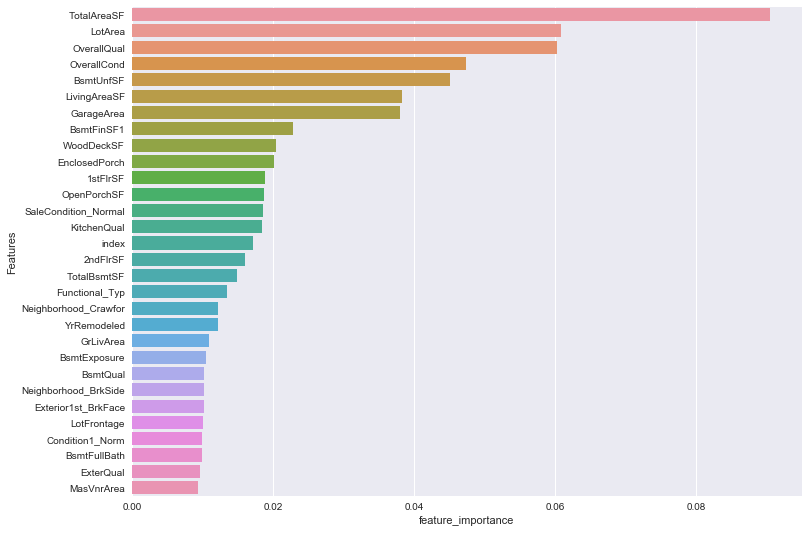

In [64]:
# Analyzing our best model GradientBoostingRegressor by getting relative importance of each attribute
varImp = pd.DataFrame({'index':X_train_all.columns, 'feature_importance':gbModel.best_estimator_.feature_importances_})
varImp.sort_values(by='feature_importance', ascending=False, inplace=True)
f, ax = plt.subplots(1, 1, figsize=[12, 9])

p = sns.barplot(x = 'feature_importance', y = 'index', data = varImp.iloc[:30,], ax = ax);
p.set_ylabel("Features")

<a id='predict_test_prep_submission'></a>
## Predict Test and Prepare Submission

### Using the best model

In [65]:
final_gbr = GradientBoostingRegressor(max_depth=gbModel.best_estimator_.max_depth, min_samples_leaf=gbModel.best_estimator_.min_samples_leaf, learning_rate=gbModel.best_estimator_.learning_rate, n_estimators=100)
final_gbr.fit(X_train_all, Y_train_all)
y_test = np.exp(final_gbr.predict(X_test))
pred_df = pd.DataFrame()
pred_df['Id'] = test_id
pred_df['SalePrice'] = y_test
pred_df.to_csv('w207_mlairev3.csv',index=False)
print('result csv generated.')

result csv generated.


### Using the ensemble of models

We will ensemble(combine) results from all models (except LinearRegression model because that is way off) to prepare an enseble prediction. The idea behind trying this approach is that some models may be good in explaning a particular type of variability (or signal). Combining these weak models will, hoepefully, help us pick the best of these individual models.

Since the performance of all 5 models are pretty close, we will use simple mean to produce ensemble predictions.

In [66]:
final_lasso = Lasso(alpha=grid_ls.best_estimator_.alpha)
final_ridge = Ridge(alpha=grid.best_estimator_.alpha)
final_elasticnet = ElasticNet(alpha=grid_en.best_estimator_.alpha, l1_ratio=grid_en.best_estimator_.l1_ratio)
final_randomforest = RandomForestRegressor(n_estimators=rfModel.best_estimator_.n_estimators, max_depth=rfModel.best_estimator_.max_depth)

models = [final_lasso, final_ridge, final_elasticnet, final_gbr, final_randomforest]
model_names = ['Lasso', 'Ridge', 'ElasticNet', 'GradientBoosting', 'RandomForest']
final_predictions = pd.DataFrame()

row_index=0

for model in models:
    model.fit(X_train_all, Y_train_all)
    final_predictions.insert(loc = row_index, column = model_names[0], value = np.exp(model.predict(X_test)))    
    model_names.pop(0)
    row_index+=1

final_predictions['mean_prediction'] = final_predictions.mean(axis=1)
print("Sample predictions...")    
final_predictions.head()

Sample predictions...


,Lasso,Ridge,ElasticNet,GradientBoosting,RandomForest,mean_prediction
0,120472.343717,124564.694821,122242.518600,135094.475505,138828.489522,128240.504433
1,161671.490316,167641.778017,159176.350599,156132.635159,155817.729072,160087.996633
2,175969.861402,182007.118347,183516.899961,183285.933820,173707.786144,179697.519935
3,188629.469899,197543.906813,198171.995078,183685.583975,181030.831083,189812.357370
4,190935.986815,197801.592458,186424.388870,199475.056190,203493.973306,195626.199528


In [67]:
pred_df_ens = pd.DataFrame()
pred_df_ens['Id'] = test_id
pred_df_ens['SalePrice'] = final_predictions['mean_prediction']
pred_df_ens.to_csv('w207_mlaire_ensemble_v1.csv',index=False)
print('ensemble result csv generated.')

ensemble result csv generated.


<a id='summary'></a>
# 7. Summary & Key Results

In this section, we will present our key findings in terms of key predictor variables and their parameter values. We will also summary the modeling process and learning from it.

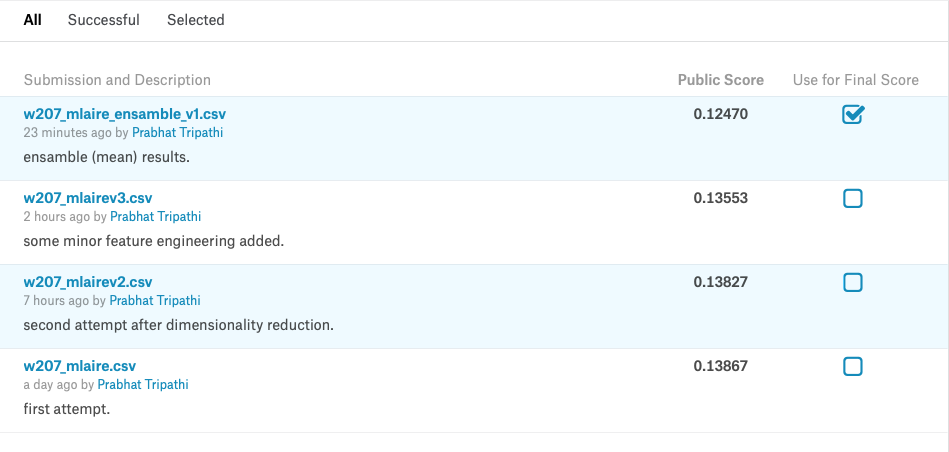

In [68]:
from IPython.display import Image
Image(filename='kaggle_submissions.png', width = 800)

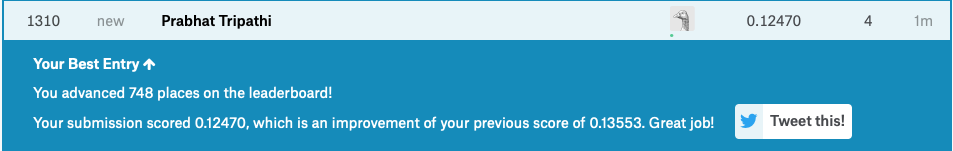

In [69]:
Image(filename='kaggle_rank.png', width = 800)

<a id='references'></a>
# 8. References

[1]: <a href="https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c">L1 and L2 Regulazation Model</a><br>
[2]: <a href="https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/">Effect of Alpha on Lasso Regression</a><br>